 <h1> ADRIÁN HERNÁNDEZ PADRÓN</h1>

En este programa trabajaremos en la resolución de problemas con valores iniciales del tipo:

<center>$y'(x)=f(x,y(x))$

<center>$ y(x_{0})=y_{0}$
    
Nosotros nos centraremos en el caso del oscilador armónico simple, cuya ecuanción diferencial es la siguiente:
<center>$y''=-w^2\cdot y$
    
si llamamos a $y' = v$,  nos queda   $v' = y'' = -w^2\cdot y$. 

De manera que hemos descompuesto nuestra ecuación diferencial en dos las cuales nos otorga información sobre la velocidad y al posición de nuestro sistema.
Para trabajar con estas dos ecuaciones a lo largo de todo el programa, definí una matriz dentro de la funcion de manera que la primera columna me guarde la posicion de la masa a lo largo del tiempo y la seguna haga lo mismo con la velocidad.

Para saber tener como referencia la gráfica de el espacio y la velocidad, empecé a trabajar integrando directamente la ecuación diferencial de modo meramente orientativo.

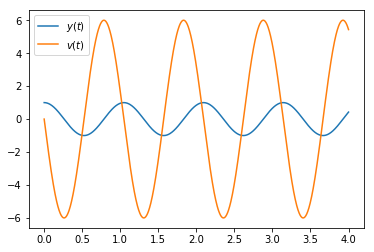

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*
from scipy.integrate import odeint

w = 6
def f(y, t): 
    return np.array([y[1], -w**2*y[0]])
t = np.linspace(0, 4, 1000)
y0 = np.array([1.0, 0.0])
sol = odeint(f, y0, t)

y1 = [0, 0]
t1 = 0

plt.plot(t, sol[:, 0], label='$y(t)$')
plt.plot(t, sol[:, 1], label='$v(t)$')
plt.legend()



Método de Euler 

Comenzamos aplicando el metodo de Euler, el cual es el mas sencillo de los tres que vamos a hacer.

Tomando el valor inicial conocido al que llamamos $y_i$, podemos hallar el siguiente valor, $y_{i+1}$, el metodo de euler para resolver estos problemas de valores iniciales es el siguiente:

$y_{i+1}=y_i+h \cdot f(x_i,y_i)$

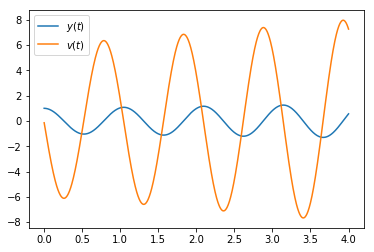

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*


w = 6
def f(y, t): # Definimos la función donde introduciremos por medio de arrays los datos de v(t) e y(t)
    return np.array([y[1], -w**2*y[0]])

t = np.linspace(0, 4, 1000)#array con los valores de t
h = 4/1000
y0 = np.array([1.0, 0.0])#condiciones iniciales
#arrays donde introduciremos los datos de v(t) e y(t)
y2 = []
y3 = []
#definimos el metodo de euler
for i in range(len (t)):
    y0 += h*f(y0, t)
    y2.append(y0[0])
    y3.append(y0[1])
     
    
#graficamos
plt.plot(t, y2 , label='$y(t)$')
plt.plot(t, y3, label='$v(t)$')
plt.legend()


Runge-kutta
El método de Runge-kutta usado es el clásico de orden 4.
El método es el siguiente:


 \begin{cases}k_{1}&=f\left(x_{i},y_{i}\right)\\k_{2}&=f\left(x_{i}+{1 \over 2}h,y_{i}+{1 \over 2}k_{1}h\right)\\k_{3}&=f\left(x_{i}+{1 \over 2}h,y_{i}+{1 \over 2}k_{2}h\right)\\k_{4}&=f\left(x_{i}+h,y_{i}+k_{3}h\right)\\\end{cases}
    
Siendo la solución de nuestro problema:

<center>$y_{i+1}=y_i+h/6\cdot*(k1 + 2k2 + 2k3 + k4)$

donde en este caso se toman dos aproximaciones diferentes para el valor de la función
en el punto medio, la segunda de ellas utilizando la calculada previamente.
 

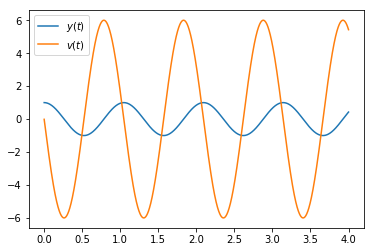

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*


w = 6
def f1(y, t): # Definimos la función donde introduciremos por medio de arrays los datos de v(t) e y(t)
    return np.array([y[1], -w**2*y[0]])

t0, tf = 0.0, 4 #cota inferior y superior por donde se va a mover nuestra función
n = 10000
h1 = (tf - t0)/n
y01 = np.array([1.0, 0.0])#condiciones iniciales
#arrays donde introduciremos los datos de v(t), y(t) y del tiempo
y22 = []
y33 = []
tt = []

#definimos el metodo de runge-kutta
for i in range (n + 1):
    t0 += h1
    tt.append(t0)
    k1 = h1 * f1(y01, t0)
    k2 = h1 * f1(y01 + (k1/2), t0 + (h1/2))
    k3 = h1 * f1(y01 + (k2/2), t0 + (h1/2))
    k4 = h1 * f1( y01 + k3,t0 + h1)
    y01 += (k1 + 2*k2 + 2*k3 + k4)/6
    y22.append(y01[0])
    y33.append(y01[1])
#graficamos   
plt.plot(tt, y22 , label='$y(t)$')
plt.plot(tt, y33, label='$v(t)$')
plt.legend()        

Predictor-corrector
Como sabemos el metodo predictor-corrector tiene varias alternativas, en este caso usamos el método de milne de cuarto orden.

El predictor en este caso es :


<center>$ y_{i+1,0}=y_{i-3}+ \dfrac {4h}{3} \cdot \left[ 2f(x_i,y_i)-f(x_{i-1},y_{i-1})+2f(x_{i-2},y_{i-2}) \right]$
    
Y el corrector:

<center>$ y_{i+1,j}=y_{i-1}+\dfrac {h}{3} \cdot \left[ f(x_{i+1},y_{i+1,j-1}^{*})+4f(x_i,y_i)+f(x_{i-1},y_{i-1}) \right] $


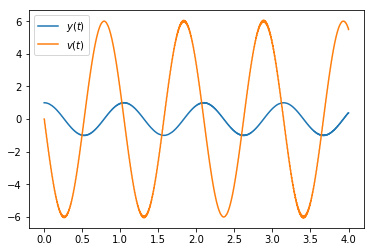

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*


w = 6
def f2(y, t): # Definimos la función donde introduciremos por medio de arrays los datos de v(t) e y(t)
    return np.array([y[1], -w**2*y[0]])

t = np.linspace(0, 4, 1000)#array con los valores de t
h = 4/1000
#en este método necesitamos 4 valores iniciales para v e y
yec = np.zeros(2000)#creamos un array con 2t ceros
yex = yec[0:8]#cogemos los 8 primeras posiciones del array y colocamos nuestras condiciones iniciales
yex[0:8] = np.array([1.0, 0.0, 0.99990181,-0.05605421,0.99960724, -0.11209742, 0.999412, -0.01679999])
y02 = yec.reshape(1000,2)#organizamos en un array de 1000x2 de manera que nos quede un array como el que hemos usado anteriormente
#vamos a trabajar con el predictor y el corrector haciendo uso de los valores iniciales
y0p = y02
y0c = y02

#definimos el método de predictor-corrector
for j in range (0, len(t)-4):
    y0p[j+4] = y02[j] + 4*h/3*(2*f2(y02[j+3],t[j+3])-f2(y02[j+2],t[j+2])+2*f2(y02[j+1],t[j+1]))
    y0c[j+2]= y02[j] + h/3*(f2(y0p[j+2],t[j+2])+4*f2(y02[j+1],t[j+1])+f2(y02[j],t[j]))
#graficamos  
plt.plot(t, y0c[:,0] , label='$y(t)$')
plt.plot(t, y0c[:,1], label='$v(t)$')
plt.legend()     
    

Podemos hacer una mejora del predictor-corrector de la siguiente manera.

El nuevo predictor será:
    
<center>$y_{i+1,0}^{*} = y_{i+1,0}+ \dfrac {28}{29} \cdot (y_{i,1}-y_{i,0})$
    
Mientras que el nuevo corrector:

<center>$y_{i+1,1}=y_{i-1}+\dfrac {h}{3} \cdot \left[ f(x_{i+1},y_{i+1,0}^{*})+4f(x_i,y_i)+f(x_{i-1},y_{i-1}) \right] $ 
   
   

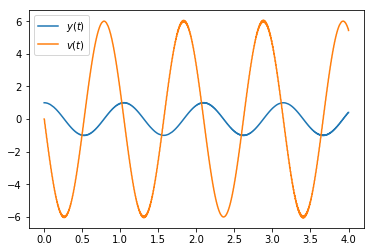

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*

#igual que el metodo del predictor-corrector añadiendo en el bucle donde definimos dicho método la mejora
w = 6
def f2(y, t): 
    return np.array([y[1], -w**2*y[0]])

t = np.linspace(0, 4, 1000)
h = 4/1000

yec = np.zeros(2000)
yex = yec[0:8]
yex[0:8] = np.array([1.0, 0.0, 0.99990181,-0.05605421,0.99960724, -0.11209742, 0.999412, -0.01679999])
y02 = yec.reshape(1000,2)
y0p = y02
y0c = y02
ypm = y02
ycm = y02

#predictor-corrector con mejora
for j in range (0, len (t)-4):
    y0p[j+4] = y0p[j] + 4*h/3*(2*f2(y0p[j+3],t[j+3])-f2(y0p[j+2],t[j+2])+2*f2(y0p[j+1],t[j+1]))
    y0c[j+2] = y0c[j] + (t[j+1]-t[j])/3*(f2(y0p[j+2],t[j+2])+4*f2(y0c[j+1],t[j+1])+f2(y0c[j],t[j]))
    ypm[j+1] = y0p[j+1] +28/29*(y0c[j]-y0p[j])
    ycm[j] = (28*y0c[j]+ypm[j])/29

#graficamos
plt.plot(t, ycm[:,0] , label='$y(t)$')
plt.plot(t, ycm[:,1], label='$v(t)$')
plt.legend()     
 
